In [41]:
#LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [52]:
df = pd.read_csv('customer_data.csv')
df.head()

,Customer ID,Gender,Age,Income,Spending,Category
0,CUST0001,Male,34,115756,7729,Home Appliances
1,CUST0002,Female,26,80461,8425,Furniture
2,CUST0003,Male,50,95418,3238,Furniture
3,CUST0004,Male,37,86672,7793,Furniture
4,CUST0005,Male,30,148232,8364,Accessories


In [53]:
df.isnull().sum()

Customer ID    0
Gender         0
Age            0
Income         0
Spending       0
Category       0
dtype: int64

In [54]:
df.describe()

,Age,Income,Spending
count,1000.000000,1000.000000,1000.000000
mean,41.656000,87359.194000,5030.091000
std,13.880574,38446.634914,2873.722885
min,18.000000,20207.000000,106.000000
25%,29.750000,52723.250000,2408.500000
50%,42.000000,88598.000000,5159.000000
75%,54.000000,121463.500000,7440.000000
max,65.000000,149992.000000,9990.000000


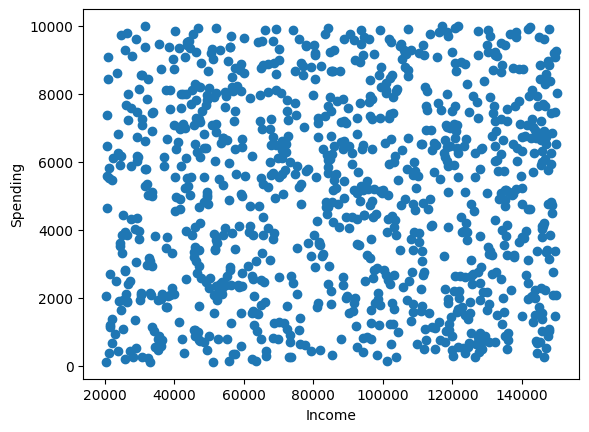

In [55]:
plt.scatter(df['Income'], df['Spending'])
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

In [56]:
df = df.drop(columns='Customer ID')
df.head()

,Gender,Age,Income,Spending,Category
0,Male,34,115756,7729,Home Appliances
1,Female,26,80461,8425,Furniture
2,Male,50,95418,3238,Furniture
3,Male,37,86672,7793,Furniture
4,Male,30,148232,8364,Accessories


In [57]:
df_new = df.copy()
df_new.head()

,Gender,Age,Income,Spending,Category
0,Male,34,115756,7729,Home Appliances
1,Female,26,80461,8425,Furniture
2,Male,50,95418,3238,Furniture
3,Male,37,86672,7793,Furniture
4,Male,30,148232,8364,Accessories


In [58]:
columns_to_scale = ['Age', 'Income', 'Spending']
data_to_scale = df[columns_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_df.index = df.index

df[columns_to_scale] = scaled_df

df.head()

,Gender,Age,Income,Spending,Category
0,Male,-0.551838,0.738973,0.939638,Home Appliances
1,Female,-1.128472,-0.179512,1.181954,Furniture
2,Male,0.601429,0.209715,-0.623925,Furniture
3,Male,-0.335601,-0.017883,0.961920,Furniture
4,Male,-0.840155,1.584099,1.160716,Accessories


In [59]:
df = pd.get_dummies(df, columns=['Gender', 'Category'], drop_first=True)
df.head()

,Age,Income,Spending,Gender_Male,Category_Automotive,Category_Electronics,Category_Furniture,Category_Home Appliances
0,-0.551838,0.738973,0.939638,True,False,False,False,True
1,-1.128472,-0.179512,1.181954,False,False,False,True,False
2,0.601429,0.209715,-0.623925,True,False,False,True,False
3,-0.335601,-0.017883,0.961920,True,False,False,True,False
4,-0.840155,1.584099,1.160716,True,False,False,False,False


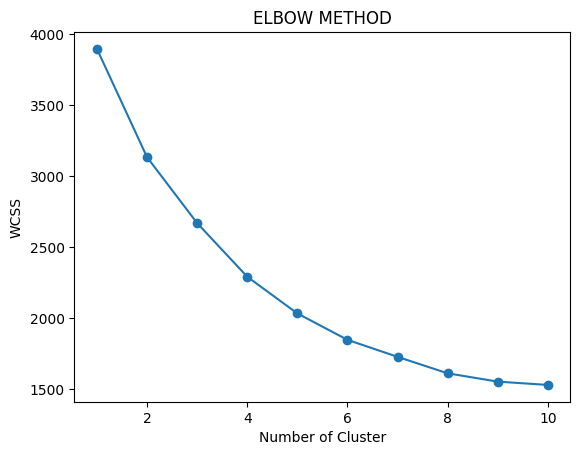

In [60]:
cluster = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(df)
    cluster.append(kmeans.inertia_)

plt.plot(range(1,11), cluster, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In [61]:
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(df)
cluster_labels = kmeans.labels_

In [62]:
df['Clusters'] = cluster_labels

In [64]:
df.head()

,Age,Income,Spending,Gender_Male,Category_Automotive,Category_Electronics,Category_Furniture,Category_Home Appliances,Clusters
0,-0.551838,0.738973,0.939638,True,False,False,False,True,2
1,-1.128472,-0.179512,1.181954,False,False,False,True,False,2
2,0.601429,0.209715,-0.623925,True,False,False,True,False,1
3,-0.335601,-0.017883,0.961920,True,False,False,True,False,0
4,-0.840155,1.584099,1.160716,True,False,False,False,False,2


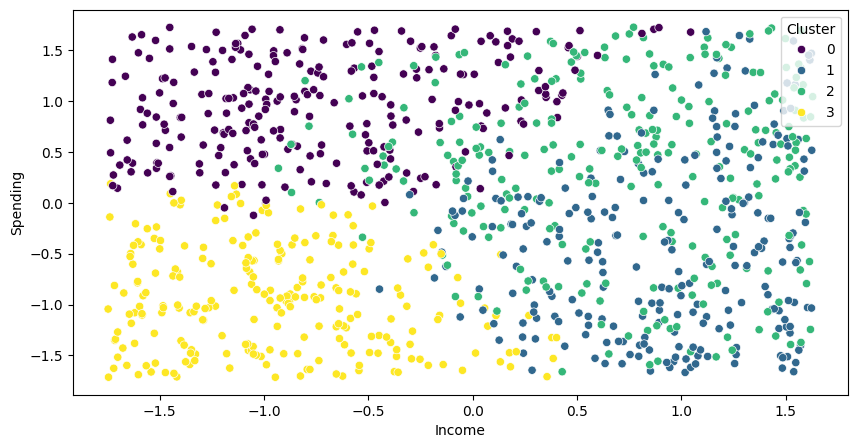

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Income', y='Spending', data=df, palette='viridis', hue=kmeans.labels_)
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend(title='Cluster', loc='upper right')
plt.show()

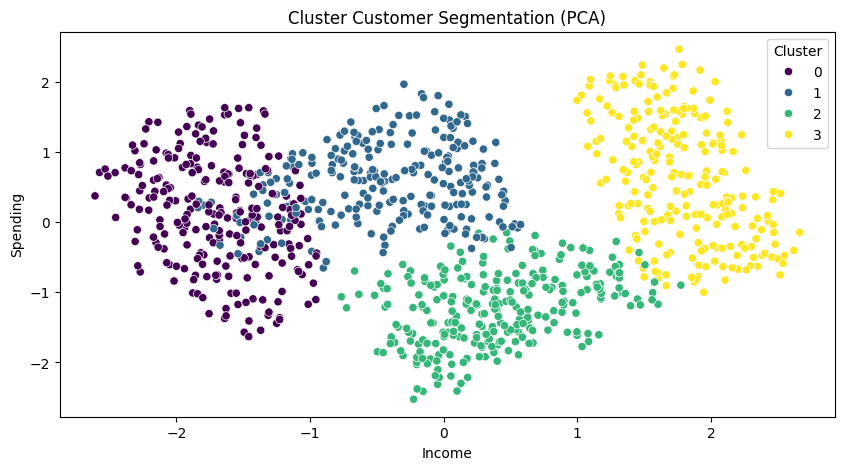

In [66]:
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df.drop('Cluster', axis=1, errors='ignore'))

df['PCA1'] = pca_components[:,0]
df['PCA2'] = pca_components[:,1]

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df.drop(['Cluster', 'PCA1', 'PCA2'], axis=1, errors='ignore'))

df['Clusters'] = labels 

plt.figure(figsize=(10,5))
sns.scatterplot(x='PCA1', y='PCA2', data=df, palette='viridis', hue='Clusters')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Cluster Customer Segmentation (PCA)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [67]:
label_0 = df[df['Clusters'] == 0]
label_1 = df[df['Clusters'] == 1]
label_2 = df[df['Clusters'] == 2]
label_3 = df[df['Clusters'] == 3]

In [68]:
print(f'Label 0 shape is {label_0.shape}')
print(f'Label 1 shape is {label_1.shape}')
print(f'Label 2 shape is {label_2.shape}')
print(f'Label 3 shape is {label_3.shape}')

Label 0 shape is (252, 11)
Label 1 shape is (247, 11)
Label 2 shape is (265, 11)
Label 3 shape is (236, 11)


In [69]:
df_new['Clusters'] = labels

In [70]:
segment1 = df_new.loc[(df_new['Clusters'] == 0)]
segment2 = df_new.loc[(df_new['Clusters'] == 1)]
segment3 = df_new.loc[(df_new['Clusters'] == 2)]
segment4 = df_new.loc[(df_new['Clusters'] == 3)]

In [75]:
segment1.head(2)

,Gender,Age,Income,Spending,Category,Clusters
3,Male,37,86672,7793,Furniture,0
5,Female,45,54832,7942,Furniture,0


In [76]:
segment2.head(2)

,Gender,Age,Income,Spending,Category,Clusters
2,Male,50,95418,3238,Furniture,1
6,Male,65,147335,6821,Home Appliances,1


In [77]:
segment3.head(2)

,Gender,Age,Income,Spending,Category,Clusters
0,Male,34,115756,7729,Home Appliances,2
1,Female,26,80461,8425,Furniture,2


In [78]:
segment4.head(2)

,Gender,Age,Income,Spending,Category,Clusters
9,Female,63,32987,3078,Accessories,3
21,Male,50,62207,2630,Home Appliances,3


In [80]:
cluster_profile = df_new[['Age', 'Income', 'Spending', 'Clusters']].groupby('Clusters').mean()

cluster_profile['size'] = df_new['Clusters'].value_counts()
cluster_profile

,Age,Income,Spending,size
Clusters,,,,
0,45.246032,59415.087302,7748.246032,252
1,52.425101,121714.805668,3865.477733,247
2,27.988679,114055.762264,5968.437736,265
3,41.898305,51263.805085,2292.898305,236


C:\Users\Guinessha\AppData\Local\Temp\ipykernel_11684\3383381676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='Age', data=df_new, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

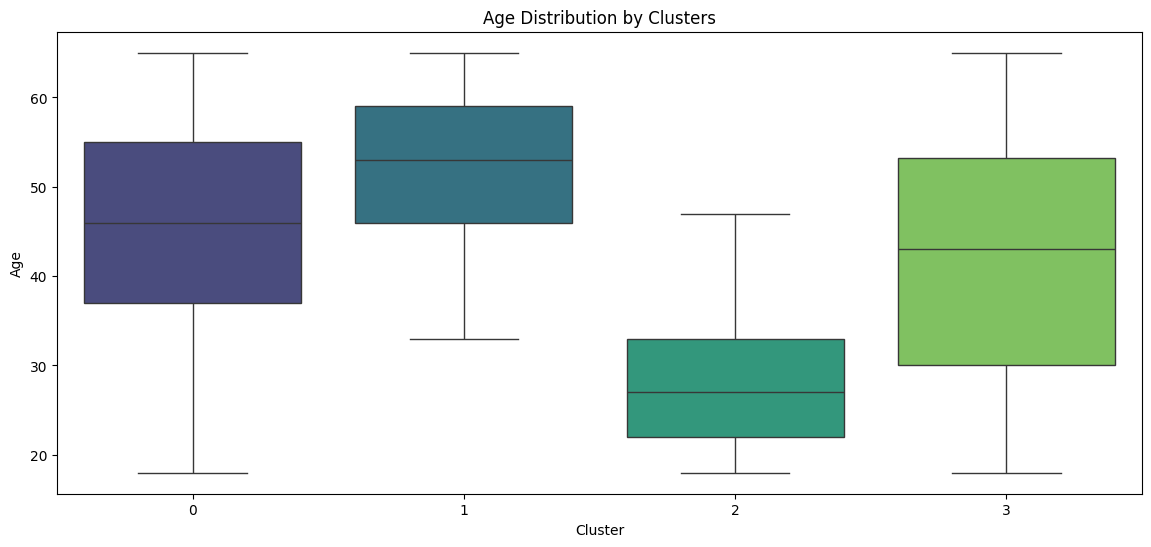

In [81]:
# Visualize Age Distribution for Each Cluster
plt.figure(figsize=(14,6))
sns.boxplot(x='Clusters', y='Age', data=df_new, palette='viridis')
plt.title('Age Distribution by Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show

C:\Users\Guinessha\AppData\Local\Temp\ipykernel_11684\1354236715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='Spending', data=df_new, palette='viridis')


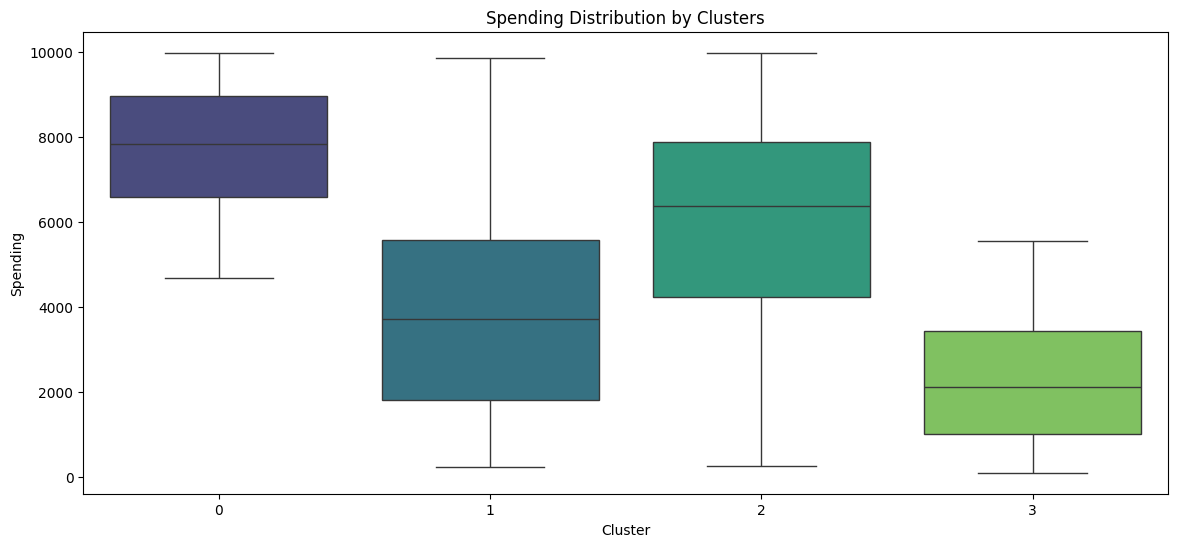

In [82]:
# Visualize Spending Distribution for Each Cluster
plt.figure(figsize=(14,6))
sns.boxplot(x='Clusters', y='Spending', data=df_new, palette='viridis')
plt.title('Spending Distribution by Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending')
plt.show()

In [83]:
s = segment1['Category'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts, 'per':percent, 'per100':percent100})

,count,per,per100
Category,,,
Electronics,59,0.234127,23.4%
Furniture,56,0.222222,22.2%
Accessories,47,0.186508,18.7%
Automotive,47,0.186508,18.7%
Home Appliances,43,0.170635,17.1%


In [84]:
s = segment2['Category'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts, 'per':percent, 'per100':percent100})

,count,per,per100
Category,,,
Furniture,55,0.222672,22.3%
Home Appliances,55,0.222672,22.3%
Electronics,49,0.198381,19.8%
Accessories,49,0.198381,19.8%
Automotive,39,0.157895,15.8%


In [85]:
s = segment3['Category'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts, 'per':percent, 'per100':percent100})

,count,per,per100
Category,,,
Automotive,61,0.230189,23.0%
Electronics,56,0.211321,21.1%
Furniture,51,0.192453,19.2%
Accessories,50,0.188679,18.9%
Home Appliances,47,0.177358,17.7%


In [86]:
s = segment4['Category'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts, 'per':percent, 'per100':percent100})

,count,per,per100
Category,,,
Electronics,59,0.250000,25.0%
Home Appliances,55,0.233051,23.3%
Accessories,45,0.190678,19.1%
Automotive,40,0.169492,16.9%
Furniture,37,0.156780,15.7%


In [87]:
s = segment1['Gender'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts, 'per':percent, 'per100':percent100})

,count,per,per100
Gender,,,
Male,142,0.563492,56.3%
Female,110,0.436508,43.7%


In [88]:
s = segment2['Gender'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts, 'per':percent, 'per100':percent100})

,count,per,per100
Gender,,,
Female,140,0.566802,56.7%
Male,107,0.433198,43.3%


In [89]:
s = segment3['Gender'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts, 'per':percent, 'per100':percent100})

,count,per,per100
Gender,,,
Male,133,0.501887,50.2%
Female,132,0.498113,49.8%


In [90]:
s = segment4['Gender'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts, 'per':percent, 'per100':percent100})

,count,per,per100
Gender,,,
Female,128,0.542373,54.2%
Male,108,0.457627,45.8%


In [ ]:
#SUMMARY

"
Segment 1 :
    Average Age : 45
    Gender : Male
    Average Income : 59.415
    Average Spending : 7.748
    Most Category : Electronics

Segment 2 :
    Average Age : 52
    Gender : Female
    Average Income : 121.714
    Average Spending : 3.865
    Most Category : Funiture

Segment 3 :
    Average Age : 27
    Gender : Male
    Average Income : 114.055
    Average Spending : 5.968
    Most Category : Automotive

Segment 4 :
    Average Age : 41
    Gender : Female
    Average Income : 51.263
    Average Spending : 2.292
    Most Category : Electronics
"